In [1]:
import pandas as pd #импорт библиотеки Pandas для работы с файфлами CSV.
from matplotlib import pyplot as plt #импорт библиотеки MathPlotLib для работы с графиками.

train.csv

<b>row_id</b>: (int64) Идентификационный код строки.

<b>timestamp</b>: (int64) время в миллисекундах между этим взаимодействием пользователя и первым завершением события от этого пользователя.

<b>user_id</b>: (int32) Идентификационный код пользователя.

<b>content_id</b>: (int16) Идентификационный код для взаимодействия с пользователем

<b>content_type_id</b>: (int8) 0, если событие было вопросом, заданным пользователю, 1, если событие было просмотром пользователем лекции.

<b>task_container_id</b>: (int16) Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит объяснения для любого из них. Все эти три будут иметь общую .task_container_id

<b>user_answer</b>: (int8) ответ пользователя на вопрос, если таковой имеется. Читайте -1 как null, для лекций.

<b>answered_correctly</b>: (int8), если пользователь ответил правильно. Читайте -1 как null, для лекций.

<b>prior_question_elapsed_time</b>: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Имеет значение null для первого пакета вопросов пользователя или лекции. Обратите внимание, что время — это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем пакете.

<b>prior_question_had_explanation</b>: (boolean) Увидел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Это значение является общим для одного пакета вопросов и имеет значение NULL для первого пакета вопросов или лекции пользователя. Как правило, первые несколько вопросов, которые видит пользователь, были частью диагностического теста, в ходе которого он не получил никакой обратной связи.


In [2]:
#Загрузка файла train.csv
data_train = pd.read_csv('train.csv',
                         sep=',',
                         index_col=0,
                         dtype = {'row_id': 'int64',
                                  'timestamp': 'int64',
                                  'user_id': 'int32',
                                  'content_id': 'int16',
                                  'content_type_id': 'int8',
                                  'task_container_id': 'int16',
                                  'user_answer': 'int8',
                                  'answered_correctly': 'int8',
                                  'prior_question_elapsed_time': 'float32',
                                  'prior_question_had_explanation': 'boolean'
                                  }
                         )

data_train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


questions.csv: метаданные для вопросов, задаваемых пользователям.

<b>question_id</b>: внешний ключ для столбца train/test content_id, если тип содержимого — вопрос (0).

<b>bundle_id</b>: код, для которого вопросы обслуживаются вместе.

<b>correct_answer</b>: ответ на вопрос. Можно сравнить со столбцом user_answer, чтобы проверить, прав ли был пользователь.

<b>part</b>: соответствующий раздел теста TOEIC.

<b>tags</b>: один или несколько подробных кодов тегов для вопроса. Значение тегов не будет указано, но этих кодов достаточно для объединения вопросов в группу.

In [36]:
#Загрузка файла questions.csv
data_questions = questions = pd.read_csv('questions.csv',
                                         sep=',',
                                         dtype = {'question_id': 'int16',
                                                  'bundle_id': 'int16',
                                                  'correct_answer': 'int8',
                                                  'part': 'int8',
                                                  'tags': 'object'
                                                  }
                                         )
data_questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


lectures.csv: метаданные для лекций, которые пользователи смотрят по мере продвижения в своем образовании.

<b>lecture_id</b>: внешний ключ для столбца train/test content_id, если тип содержимого — lecture (1).

<b>part</b>: код категории верхнего уровня для лекции.

<b>tag</b>: один код тега для лекции. Значение тегов не будет указано, но этих кодов достаточно для объединения лекций в одну группу.

<b>type_of</b>: краткое описание основной цели лекции

In [37]:
#Загрузка файла lectures.csv
data_lectures = pd.read_csv('lectures.csv',
                            sep=',',
                            dtype = {'lecture_id': 'int16',
                                     'tag': 'int16',
                                     'part': 'int8',
                                     'type_of': 'object'
                                     }
                            )
data_lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [57]:
#перевод милисекунд в минуты
data_train["timestamp"] = (data_train["timestamp"] / 60000)
data_train["prior_question_elapsed_time"] = data_train["prior_question_elapsed_time"] / 60000

In [58]:
#Проверим пропуски в DataFrame data_train
data_train.isna().sum()

timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

Из описания данных, можно сдеклать выводы, что около 2,3 млн записей, возможно, имели первый пакет вопросов или лекций по выовду столбца “prior_question_elapsed_time”. И около 400 тыс. записей, возможно, имели первый пакет вопросов или лекций по вывовду столбца “prior_question_had_explanation”.

In [59]:
#Посмотрим общую информацию о DataFrame data_train
print(data_train.info())
print(data_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       float64
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), float64(1), int16(2), int32(1), int8(3)
memory usage: 3.1 GB
None
          timestamp       user_id    content_id  content_type_id   
count  1.012303e+08  1.012303e+08  1.012303e+08     1.012303e+08  \
mean   1.283941e+05  1.076732e+09  5.219605e+03     1.935222e-02   
std    1.932109e+05  6.197163e+08  3.866359e+03     1.377596e-01   
min    0.000000e+00  1.1

Выводы по сводке числовых характеристик:
    <ul>
        <li><b>timestamp</b>: в среднем человек тратит около 130 тыс. минут на взаимодействие. Также скорее всего присутствуют выбросы, если сравнивать медиану со средним значением и нижнюю/верхнюю квантиль с минимальным/максимальным значением.</li>
        <li><b>user_id</b>: для этого признака высчитанные характеристики бесполезны.</li>
        <li><b>content_id</b>:для этого признака высчитанные характеристики бесполезны.</li>
        <li><b>content_type_id</b>:для этого признака высчитанные характеристики бесполезны.</li>
        <li><b>task_container_id</b>:для этого признака высчитанные характеристики бесполезны.</li>
        <li><b>user_answer</b>:для этого признака высчитанные характеристики бесполезны.</li>
        <li><b>answered_correctly</b>:для этого признака высчитанные характеристики бесполезны.</li>
        <li><b>prior_question_elapsed_time</b>: в среднем среднее время ответа человека состовляет 0,42 минуты. Скорее всего выбросов тут нет, если сравнивать медиану со средним значением и нижнюю/верхнюю квантиль с минимальным/максимальным значением. Но много пропусков.</li>
    </ul>

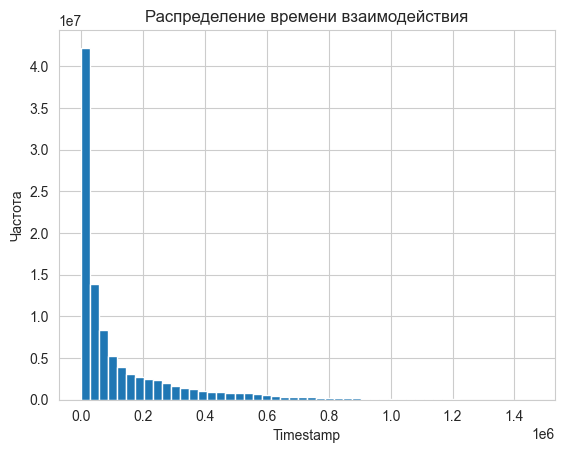

In [60]:
# Построим гистограмму распределения времени взаимодействия во всём датасете
plt.hist(data_train['timestamp'], bins=50)
plt.xlabel('Timestamp')
plt.ylabel('Частота')
plt.title('Распределение времени взаимодействия')
plt.show()

Из визуализации распределения видно, что ребята очень мало по времени взаимодействуют с событием. Также возникает предположение о том, что время взаимодействия распределено экспоненциально (эту гипотезу можно проверить после разведочного анализа данных). Теперь построим ящик с усами для этого признака.

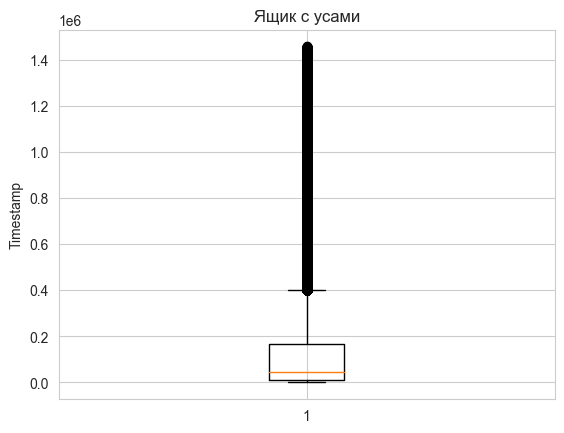

In [61]:
# Построим BoxPlot для анализа выбросов
plt.boxplot(data_train['timestamp'])
plt.ylabel('Timestamp')
plt.title('Ящик с усами')
plt.show()

В пределах квантилей находится статистически значимая часть выборки.

Необходимо разделить DataFrame на взаимодействие с лекциями и с вопросами, чтобы правильно обработать пропуски.

In [41]:
lectures = pd.DataFrame(data_train.loc[data_train["content_type_id"] == 1]) #все строки с лекциями пользователя
questions = pd.DataFrame(data_train.loc[data_train["content_type_id"] != 1]) # все строки с вопросами

In [42]:
#просмотр
lectures

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
89,653762,2746,6808,1,14,-1,-1,NaN,False
117,10183847,5382,16736,1,21,-1,-1,NaN,False
212,1424348597,5382,30207,1,104,-1,-1,NaN,False
216,1425557777,5382,18545,1,121,-1,-1,NaN,False
295,405813029,8623,10540,1,59,-1,-1,NaN,False
...,...,...,...,...,...,...,...,...,...
101230063,132157858,2147482216,14325,1,38,-1,-1,NaN,False
101230195,1073593458,2147482216,21887,1,170,-1,-1,NaN,False
101230218,1240316256,2147482216,6808,1,193,-1,-1,NaN,False


In [95]:
#просмотр
questions

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0.000000,115,5692,0,1,3,1,NaN,<NA>
1,0.949050,115,5716,0,2,2,1,0.616667,False
2,1.972717,115,128,0,0,0,1,0.916667,False
3,2.186117,115,7860,0,3,0,1,0.316667,False
4,2.299417,115,7922,0,4,1,1,0.183333,False
...,...,...,...,...,...,...,...,...,...
101230327,7142.740333,2147482888,3586,0,22,0,1,0.300000,True
101230328,7143.083333,2147482888,6341,0,23,3,1,0.233333,True
101230329,7143.557917,2147482888,4212,0,24,3,1,0.233333,True


Теперь проанализируем датасет с взаимодействием с лекциями.

In [96]:
#Количество пропусков в лекциях
lectures.isna().sum()

timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       1959032
prior_question_had_explanation          0
dtype: int64

Очевидно, что наибольшее количество пропусков будет в данных, в которых пакет представляет из себя лекции. “prior_question_elapsed_time” и “prior_question_had_explanation” не информативны здесь, поэтому мы можем их не анализировать здесь. Здесь можно посмотреть уникальные значения, посмотреть среднее время просмотра каждого пакета лекций и в целом, гистограмму распределения количества людей по лекциям.

In [100]:
lectures["timestamp"].describe()

count    1.959032e+06
mean     1.297331e+05
std      1.912345e+05
min      0.000000e+00
25%      1.505879e+04
50%      4.901668e+04
75%      1.610053e+05
max      1.453212e+06
Name: timestamp, dtype: float64

Анализируя таблицу выше:
    <ul>
        <li>В среднем, каждый пользователь тратит 120 тыс. минут на лекцию.</li>
        <li>Так же видно, что есть пользователи, которые скорее всего, либо только начали обучение, либо не занимается почти.</li>
        <li>Скорее всего есть некоторые выбросы, если сравнивать медиану со средним значением и нижнюю/верхнюю квантиль с минимальным/максимальным значением.</li>
    </ul>

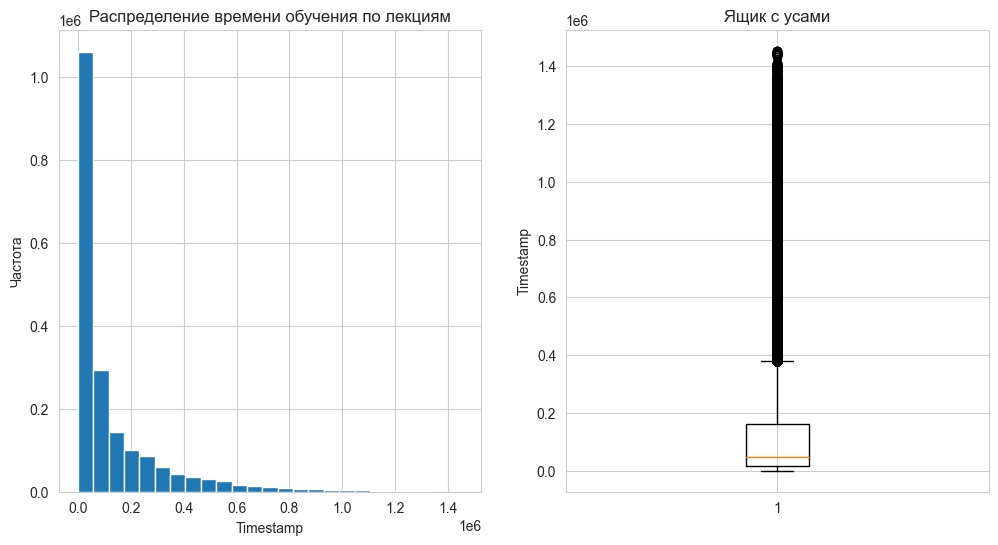

In [112]:
# Построим гистограмму распределения времени обучения по лекциям всем
# Построим BoxPlot для анализа выбросов

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(lectures["timestamp"], bins=25)
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Частота')
axs[0].set_title('Распределение времени обучения по лекциям')

axs[1].boxplot(lectures["timestamp"])
axs[1].set_ylabel('Timestamp')
axs[1].set_title('Ящик с усами')

plt.show()

По графикам видно, что выбросов так же очень много, и можно предположить, что распределение будет экспоненциальным.

In [114]:
lectures_time = lectures[["timestamp",
                          "task_container_id"
                          ]].groupby("task_container_id").mean().reset_index() #среднее время каждого лекционного пакета

user_lectures = lectures[["timestamp",
                          "user_id"
                          ]].groupby("user_id").sum() #время обучения по всем лекциям кажнодо пользователя

In [115]:
user_lectures.describe()

,timestamp
count,1.496060e+05
mean,1.698804e+06
std,6.479046e+06
min,0.000000e+00
25%,1.161449e+04
50%,1.187897e+05
75%,7.831176e+05
max,3.040234e+08


Анализируя таблицу выше:
    <ul>
        <li>В среднем, каждый пользователь тратит 1,7 млн минут на лекцию.</li>
        <li>Так же видно, что есть пользователи, которые скорее всего, либо только начали обучение, либо не занимается почти.</li>
        <li>Скорее всего есть некоторые выбросы, если сравнивать и нижнюю/верхнюю квантиль с минимальным/максимальным значением.</li>
    </ul>

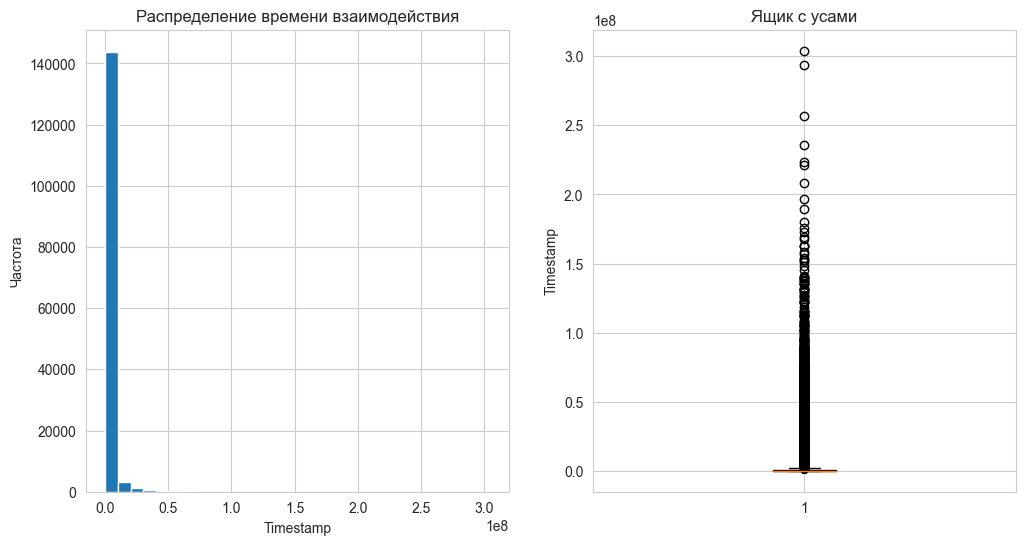

In [116]:
# Построим гистограмму распределения времени изучения лекций
# Построим BoxPlot для анализа выбросов

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(user_lectures, bins=30)
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Частота')
axs[0].set_title('Распределение времени взаимодействия')

axs[1].boxplot(user_lectures)
axs[1].set_ylabel('Timestamp')
axs[1].set_title('Ящик с усами')

plt.show()

Предположения о распределении нет, выбросов очень много.

In [119]:
lectures_time["timestamp"].describe()

count    9.369000e+03
mean     3.497157e+05
std      1.820965e+05
min      3.543157e+03
25%      2.329698e+05
50%      3.139279e+05
75%      4.285589e+05
max      1.445935e+06
Name: timestamp, dtype: float64

Анализируя таблицу выше:
    <ul>
        <li>В среднем, тратится на 1 пакет лекций 350 тыс. минут.</li>
        <li>Скорее всего есть некоторые выбросы, если сравнивать и нижнюю/верхнюю квантиль с минимальным/максимальным значением.</li>
    </ul>

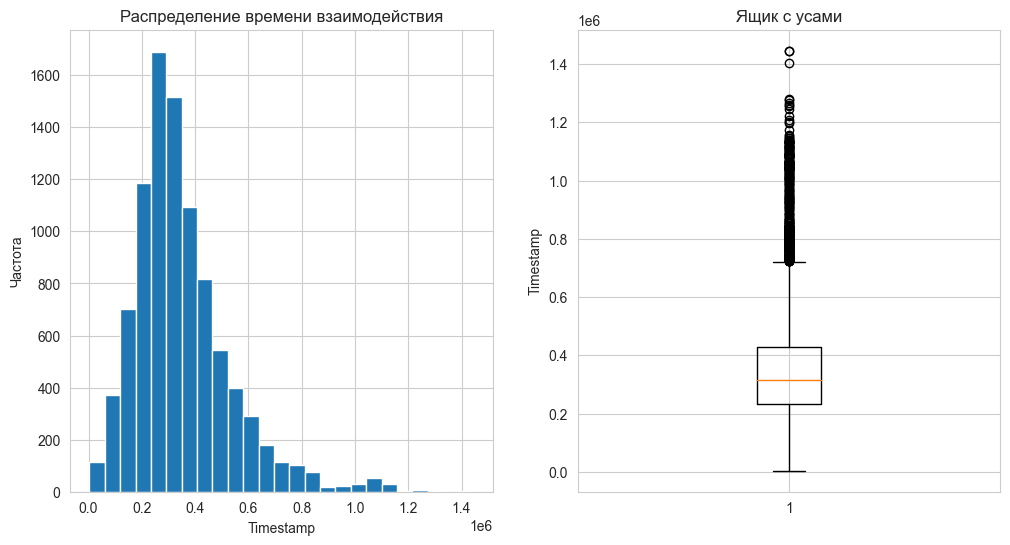

In [120]:
# Построим гистограмму распределения среднего времени обучения одному пакету лекций
# Построим BoxPlot для анализа выбросов

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(lectures_time['timestamp'], bins=25)
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Частота')
axs[0].set_title('Распределение времени взаимодействия')

axs[1].boxplot(lectures_time["timestamp"])
axs[1].set_ylabel('Timestamp')
axs[1].set_title('Ящик с усами')

plt.show()

Распределение больше похоже на нормальное, выбросов по прежнему много.

In [10]:
#Проанализируем датафрейм с вопросами
questions[["timestamp","prior_question_elapsed_time"]].describe()

,timestamp,prior_question_elapsed_time
count,9.927130e+07,9.887879e+07
mean,7.702058e+09,2.542385e+04
std,1.159498e+10,1.994815e+04
min,0.000000e+00,0.000000e+00
25%,5.195280e+08,1.600000e+04
50%,2.669611e+09,2.100000e+04
75%,9.929147e+09,2.966600e+04
max,8.742577e+10,3.000000e+05


Анализируя таблицу выше:
    <ul>
        <li>В среднем, тратится 128334 минуты на ответ на вопрос.</li>
        <li>В среднем пользователь тратит 25 секунд на ответ на каждый вопрос в предыдущем пакете игнорируя лекции.</li>
    </ul>

In [15]:
questions["prior_question_elapsed_time"].isna().sum() #ищем пропуски
mq = questions["prior_question_elapsed_time"].mean() #ищем среднее значение
questions["prior_question_elapsed_time"] = questions["prior_question_elapsed_time"].fillna(mq) #заполняем пропуски
questions["prior_question_elapsed_time"].isna().sum()#ищем пропуски

0

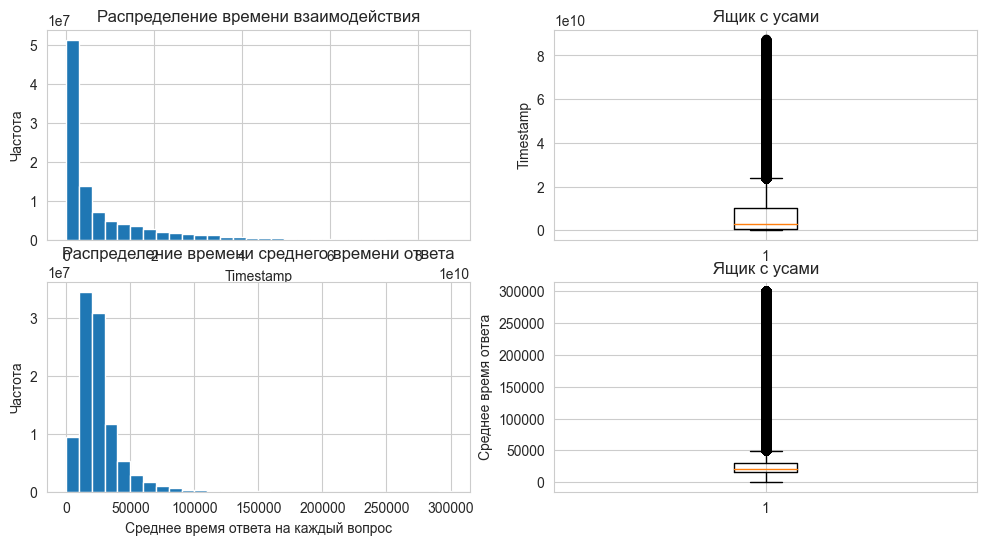

In [23]:
# Построим гистограммы распределения
# Построим BoxPlot для анализа выбросов

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].hist(questions["timestamp"], bins=30)
axs[0, 0].set_xlabel('Timestamp')
axs[0, 0].set_ylabel('Частота')
axs[0, 0].set_title('Распределение времени взаимодействия')

axs[0, 1].boxplot(questions["timestamp"])
axs[0, 1].set_ylabel('Timestamp')
axs[0, 1].set_title('Ящик с усами')

axs[1, 0].hist(questions["prior_question_elapsed_time"], bins=30)
axs[1, 0].set_xlabel('Среднее время ответа на каждый вопрос')
axs[1, 0].set_ylabel('Частота')
axs[1, 0].set_title('Распределение времени среднего времени ответа')

axs[1, 1].boxplot(questions["prior_question_elapsed_time"])
axs[1, 1].set_ylabel('Среднее время ответа')
axs[1, 1].set_title('Ящик с усами')

plt.show()

Эти два признака имеют очень много выбросов, а эмперические распределения можно проверить на теоретические в дальнейшем анализе.

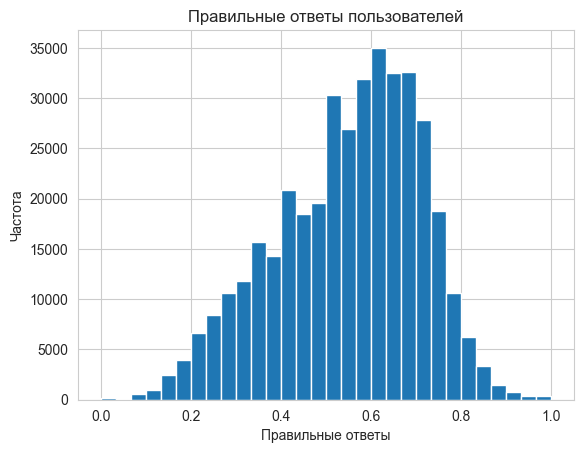

In [29]:
# Выделим активных пользователей и пользователей с низкой и высокой успеваемостью
user_OK = questions.groupby("user_id")["answered_correctly"].mean()
plt.hist(user_OK, bins=30)
plt.xlabel("Правильные ответы")
plt.ylabel("Частота")
plt.title("Правильные ответы пользователей")
plt.show()

В целом, большинство пользователей учится на оценку 3-4.

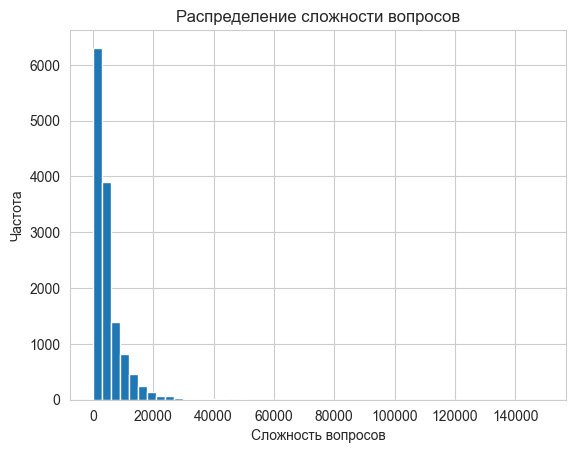

In [30]:
#Оценим сложность вопросов
question_difficulty = questions.groupby('content_id')['answered_correctly'].sum()
plt.hist(question_difficulty, bins=50)
plt.xlabel('Сложность вопросов')
plt.ylabel('Частота')
plt.title('Распределение сложности вопросов')
plt.show()

Из графика видно, что по первым пакетам справляется больше студентов. Следовательно, по мере углубления материала, сложность возрастает.

In [38]:
#Посмотрим общую информацию о DataFrame data_questions
print(data_questions.info())
print(data_questions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB
None
       question_id     bundle_id  correct_answer          part
count  13523.00000  13523.000000    13523.000000  13523.000000
mean    6761.00000   6760.510907        1.455298      4.264956
std     3903.89818   3903.857783        1.149707      1.652553
min        0.00000      0.000000        0.000000      1.000000
25%     3380.50000   3379.500000        0.000000      3.000000
50%     6761.00000   6761.000000        1.000000      5.000000
75%    10141.50000  10140.000000        3.000000      5.000000
max    13522.0

В DataFrame для вопросов в столбце tags есть одно пропущенное значение, так как численность его значений не совпадает с численностью других столбцов.

In [39]:
#Посмотрим общую информацию о DataFrame data_lectures
print(data_lectures.info())
print(data_lectures.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB
None
         lecture_id         tag        part
count    418.000000  418.000000  418.000000
mean   16983.401914   94.480861    4.267943
std     9426.164660   53.586487    1.872424
min       89.000000    0.000000    1.000000
25%     9026.250000   50.250000    2.000000
50%    17161.500000   94.500000    5.000000
75%    24906.250000  140.000000    6.000000
max    32736.000000  187.000000    7.000000


В DataFrame для лекций нет пропусков.

В во всех таблицах идентификаторы в качестве признаков не являются информативными, но они полезны для объединения таблиц по внешним ключам.

In [44]:
#Объединение вопросов и ответов
merged_data = pd.merge(questions, data_questions, left_on="content_id", right_on="question_id", how="left")
#Анализ метаданных лекций
merged_data = pd.merge(merged_data, data_lectures, left_on="content_id", right_on="lecture_id", how="left")

merged_data = merged_data.dropna(axis="rows")

MemoryError: Unable to allocate 189. MiB for an array with shape (2, 99271300) and data type int8

Учитывая ограничения моего ноутбука, это максимальный объем анализа, который я смогла провести. Спасибо за внимание!